# Setup

In [1]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 19.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [2]:
# Install Albumentation library
%pip install albumentations
# Install LR finder
%pip install torch-lr-finder
# Install GradCam
%pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.0-py3-none-any.whl size=38071 sha256=30f3357730f3e788df6cf3b075e05b5ca2214948c65e5983b9616c407c72da8d
  Stored in directory: /root/.cache/pip/wheels/5b/e5/3d/8548241d5cffe53ad1476c566a61ad9bf09cc61a9430f09726
Successfully built grad-cam


In [3]:
%pip install torchsummary

In [4]:
!pip install lightning


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.5 MB/s eta 0:00:00


In [5]:
!pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00


## Import libraries

In [6]:
# Import libraries
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import math
from collections import OrderedDict
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
# import pytorch_lightning as pl
import lightning.pytorch as pl
from torch_lr_finder import LRFinder

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from lightning.pytorch.callbacks import ModelCheckpoint, TQDMProgressBar


## Setup WandbLogger

In [7]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [8]:
from lightning.pytorch.loggers import WandbLogger
wandb_logger = WandbLogger(project='CIFAR',
                           log_model='all') # log all new checkpoints during training

## Setup Dataloader

In [9]:
from data_pl import CIFARDataModule
cifar = CIFARDataModule()

## Setup Callbacks

In [10]:
class LitProgressBar(TQDMProgressBar):
  def init_validation_tqdm(self):
         bar = super().init_validation_tqdm()
         bar.set_description('running validation ...')
         return bar
bar_callback = LitProgressBar(refresh_rate=10)

val_every_n_epochs = 1

checkpoint_callback = ModelCheckpoint(
        # dirpath=checkpoints_path, # <--- specify this on the trainer itself for version control
        filename="cifar_classifier_{epoch:02d}",
        every_n_epochs=val_every_n_epochs,
        save_top_k=-1,  # <--- this is important!
    )

## Train the Model

In [11]:
# check if everything is setup correctly
from resnet_pl import ResNet18
model = ResNet18()

trainer = pl.Trainer(fast_dev_run=True)
trainer.fit(model, cifar)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
INFO:lightning.pytorch.utilities.rank_zero:Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.


100%|██████████| 170498071/170498071 [00:01<00:00, 90916073.48it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type               | Params
-------------------------------------------------
0 | conv1     | Conv2d             | 1.7 K 
1 | bn1       | BatchNorm2d        | 128   
2 | layer1    | Sequential         | 147 K 
3 | layer2    | Sequential         | 525 K 
4 | layer3    | Sequential         | 2.1 M 
5 | layer4    | Sequential         | 8.4 M 
6 | linear    | Linear             | 5.1 K 
7 | accuracy  | MulticlassAccuracy | 0     
8 | criterion | CrossEntropyLoss   | 0     
-------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.696    Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type               | Params
-------------------------------------------------
0 | conv1     | Conv2d             | 1.7 K 
1 | bn

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_steps=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


In [12]:
len(cifar.train_dataloader())

98

In [13]:
# Train model on whole dataset
from resnet_pl import ResNet18
from data_pl import CIFARDataModule
cifar = CIFARDataModule()
model = ResNet18()
max_epochs = 20
trainer = pl.Trainer(
        callbacks=[checkpoint_callback, bar_callback],
        default_root_dir='./checkpoints/',
        check_val_every_n_epoch=val_every_n_epochs,
        max_epochs=max_epochs,
        logger=wandb_logger
    )
trainer.fit(model, cifar)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
wandb: Currently logged in as: varsha_r. Use `wandb login --relogin` to force relogin


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type               | Params
-------------------------------------------------
0 | conv1     | Conv2d             | 1.7 K 
1 | bn1       | BatchNorm2d        | 128   
2 | layer1    | Sequential         | 147 K 
3 | layer2    | Sequential         | 525 K 
4 | layer3    | Sequential         | 2.1 M 
5 | layer4    | Sequential         | 8.4 M 
6 | linear    | Linear             | 5.1 K 
7 | accuracy  | MulticlassAccuracy | 0     
8 | criterion | CrossEntropyLoss   | 0     
-------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.696    Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type               | Params
-------------------------------------------------
0 | conv1     | Conv2d             | 1.7 K 
1 | bn

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [14]:
from google.colab import drive
drive.mount('/content/drive')
trainer.save_checkpoint("/content/drive/MyDrive/final_cifar_resnetmodel1.ckpt")

wandb.finish()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
train_acc,▁▂▃▄▄▄▄▅▅▅▆▆▆▆▆▆▆▆▇▇▇▆▇▇▇▇▇▇▇▇▇████████
train_loss,█▇▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
val_acc,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇█████
val_loss,█▆▄▃▃▂▂▂▂▂▂▂▁▁▅▁▃▂▁▂
epoch,19
train_acc,0.9375
train_loss,0.18762
trainer/global_step,1959
val_acc,0.89588


## Visualize results

In [15]:
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA Available? True


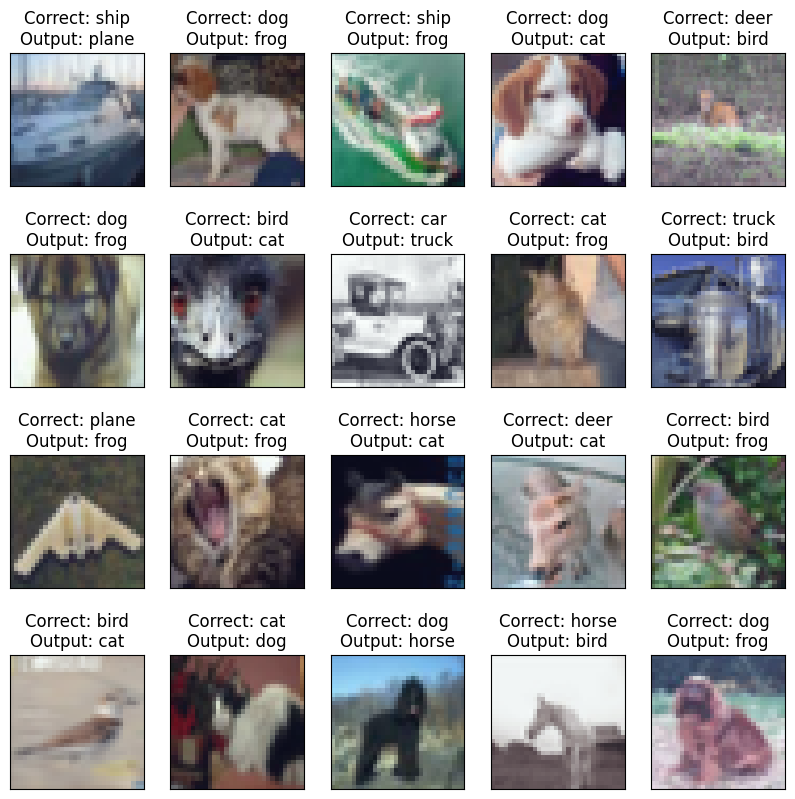

In [16]:
from utils import get_misclassified_data
from visualize import display_cifar_misclassified_data

# Denormalize the data using test mean and std deviation
inv_normalize = transforms.Normalize(
    mean=[-0.50/0.23, -0.50/0.23, -0.50/0.23],
    std=[1/0.23, 1/0.23, 1/0.23]
)
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
# Get the misclassified data from test dataset
misclassified_data = get_misclassified_data(model.to(device), device, cifar.val_dataloader())

# Plot the misclassified data
display_cifar_misclassified_data(misclassified_data, classes, inv_normalize, number_of_samples=20)

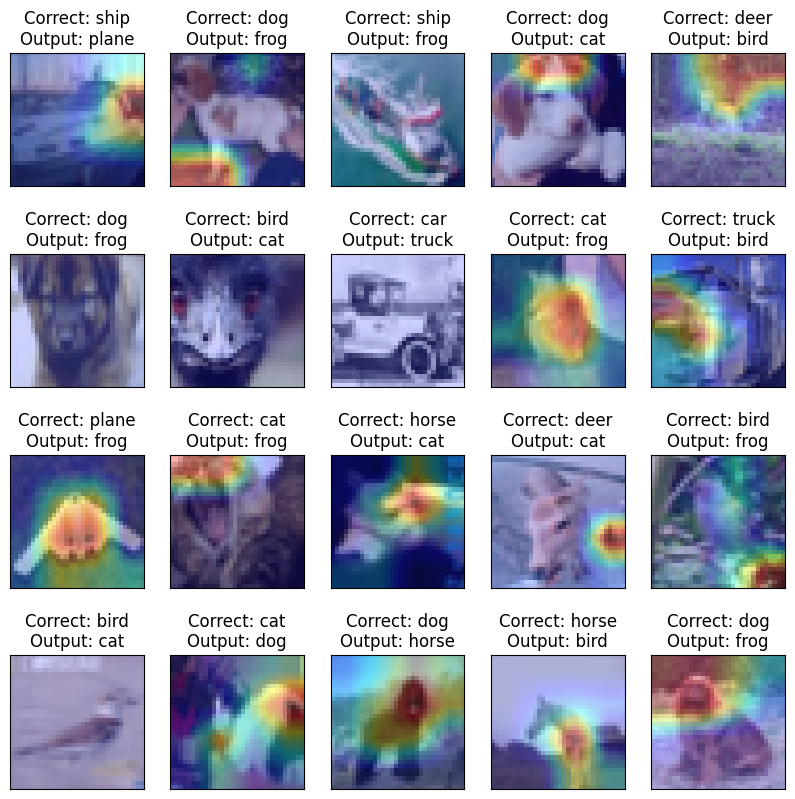

In [17]:
from utils import display_gradcam_output
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

target_layers = [model.layer4[-1]]
targets = [ClassifierOutputTarget(7)]
# targets = None

display_gradcam_output(misclassified_data, classes, inv_normalize, model, target_layers, targets, number_of_samples=20, transparency=0.70)

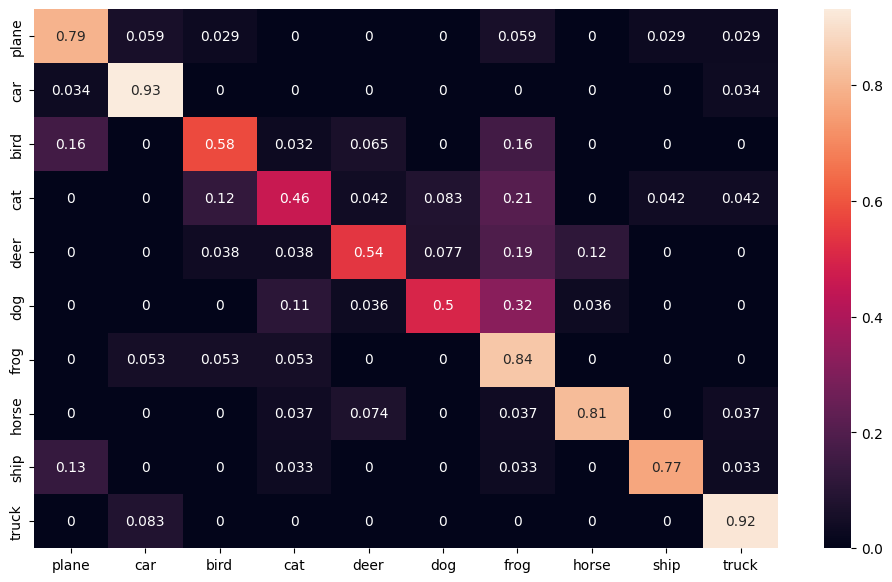

In [18]:
from visualize import visualize_confusion_matrix


visualize_confusion_matrix(classes, device, model,  cifar.val_dataloader())